# ニューラルネットワークの学習

## 二乗和誤差

In [1]:
import sys, os 
import numpy as np

In [2]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

def means_square_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [3]:
means_square_error(np.array(y),np.array(t))

0.09750000000000003

In [4]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [5]:
means_square_error(np.array(y),np.array(t))

0.5975

In [6]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

## 交差エントロピー誤差

In [7]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [8]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

## ミニバッチ学習

In [9]:
import sys, os
sys.path.append(os.pardir) 
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10 
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
np.random.choice(60000,10)

array([35781, 28529, 31749, 29631,  9654, 23413,  2889, 40010,  5802,
       14503])

# 勾配法

In [12]:
def function_2(x):
    return x[0]**2+x[1]**2

In [13]:

def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

In [14]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [15]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr *grad
        return x

In [16]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num=100)

array([-2.4,  3.2])

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [18]:
net = simpleNet()

In [19]:
print(net.W)

[[ 0.5014895  -0.91259754  0.19468958]
 [ 0.55678367  1.26303371 -0.08605653]]


In [20]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[0.80199901 0.58917182 0.03936287]


In [21]:
np.argmax(p)

0

In [24]:
t = np.array([1,0,0])
net.loss(x,t)

0.8218615866372239

In [26]:
def f(W):
    return net.loss(x,t)

In [27]:
dW = numerical_gradient(f,net.W)

In [28]:
print(dW)

[[-0.33623247  0.21320207  0.1230304 ]
 [-0.50434871  0.31980311  0.1845456 ]]


# 4.5学習アルゴリズムの実装

In [30]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t) #エントロピー誤差を返す
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1) 
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy #認識精度
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        


In [34]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)

In [35]:
net.params['W1'].shape

(784, 100)

In [43]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

In [44]:
grads = net.numerical_gradient(x,t)

In [45]:
grads['W1'].shape

(784, 100)

## 4.5.2ミニバッチ処理

In [4]:
%%time
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=5, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.49133333333333334, 0.4958
train acc, test acc | 0.7652, 0.7789
train acc, test acc | 0.8127666666666666, 0.822
train acc, test acc | 0.8380666666666666, 0.8453
train acc, test acc | 0.8499833333333333, 0.8556
train acc, test acc | 0.8574333333333334, 0.8603
train acc, test acc | 0.8620666666666666, 0.8644
train acc, test acc | 0.8660333333333333, 0.8681
train acc, test acc | 0.8698833333333333, 0.8699
train acc, test acc | 0.8720833333333333, 0.8719
train acc, test acc | 0.8745833333333334, 0.8728
train acc, test acc | 0.8766666666666667, 0.874
train acc, test acc | 0.8784166666666666, 0.8746
train acc, test acc | 0.8797333333333334, 0.8791
train acc, test acc | 0.87975, 0.8756
train acc, test acc | 0.8814166666666666, 0.8807
CPU times: user 28.9 s, sys: 10.3 s, total: 39.1 s
Wall time: 43.1 s


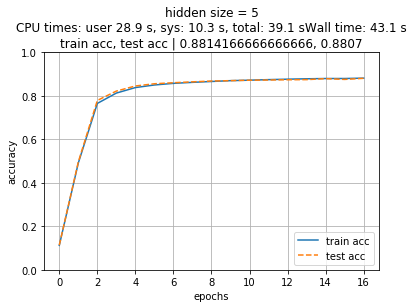

In [7]:
# グラフの描画
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('hidden size = 5\nCPU times: user 28.9 s, sys: 10.3 s, total: 39.1 sWall time: 43.1 s\ntrain acc, test acc | 0.8814166666666666, 0.8807')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.savefig("hiddensize5")
plt.grid(True)

In [ ]:
%%time
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list2 = []
train_acc_list2 = []
test_acc_list2 = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list2.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list2.append(train_acc)
        test_acc_list2.append(test_acc)
        print("train acc2, test acc2 | " + str(train_acc) + ", " + str(test_acc))

train acc2, test acc2 | 0.10441666666666667, 0.1028


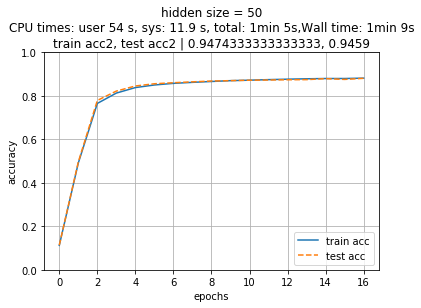

In [8]:
markers = {'train': 'o', 'test': 's'}

x = np.arange(len(train_acc_list))
plt.subplot(1,2,1)
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('hidden size = 5\ntotaltime:')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.savefig("hiddensize5")
plt.grid(True)

markers = {'train': 'o', 'test': 's'}

x = np.arange(len(train_acc_list))
plt.subplot(1,2,2)
plt.plot(x, train_acc_list2, label='train acc')
plt.plot(x, test_acc_list2, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('hidden size = 50\ntotal:1min 5s)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.savefig("hiddensize50")
plt.grid(True)

In [9]:
%%time
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=500, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network「.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.8443333333333334, 0.8496
train acc, test acc | 0.8883666666666666, 0.8943
train acc, test acc | 0.9020666666666667, 0.9067
train acc, test acc | 0.90455, 0.9075
train acc, test acc | 0.9102166666666667, 0.9127
train acc, test acc | 0.9117833333333333, 0.9163
train acc, test acc | 0.91615, 0.9175
train acc, test acc | 0.9171666666666667, 0.9197
train acc, test acc | 0.9207666666666666, 0.9233
train acc, test acc | 0.9212333333333333, 0.9222
train acc, test acc | 0.9223, 0.9242
train acc, test acc | 0.9256, 0.9271
train acc, test acc | 0.92615, 0.9268
train acc, test acc | 0.9276833333333333, 0.9266
train acc, test acc | 0.9312, 0.9302
train acc, test acc | 0.9327, 0.932
CPU times: user 5min 50s, sys: 51.5 s, total: 6min 41s
Wall time: 5min 46s


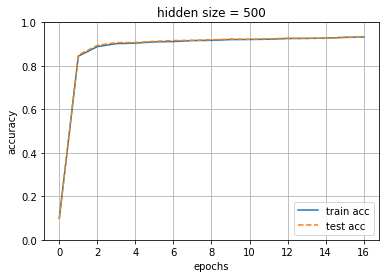

In [12]:
# グラフの描画
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('hidden size = 500')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.savefig("hiddensize500")
plt.grid(True)

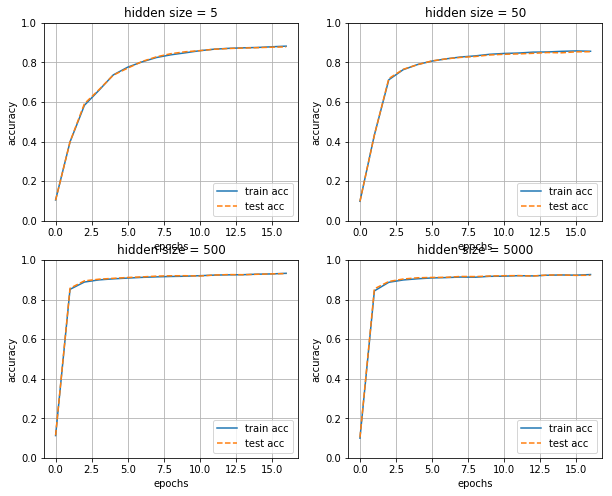

In [51]:
# グラフの描画
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

x = np.arange(len(train_acc_list))


axes[0,0].plot(x, train_acc_list3, label='train acc')
axes[0,0].plot(x, test_acc_list3, label='test acc', linestyle='--')
axes[0,0].set_xlabel("epochs")
axes[0,0].set_ylabel("accuracy")
axes[0,0].set_title('hidden size = 5')
axes[0,0].set_ylim(0, 1.0)
axes[0,0].legend(loc='lower right')
axes[0,0].grid(True)

axes[0,1].plot(x, train_acc_list, label='train acc')
axes[0,1].plot(x, test_acc_list, label='test acc', linestyle='--')
axes[0,1].set_xlabel("epochs")
axes[0,1].set_ylabel("accuracy")
axes[0,1].set_title('hidden size = 50')
axes[0,1].set_ylim(0, 1.0)
axes[0,1].legend(loc='lower right')
axes[0,1].grid(True)


axes[1,0].plot(x, train_acc_list4, label='train acc')
axes[1,0].plot(x, test_acc_list4, label='test acc', linestyle='--')
axes[1,0].set_title('hidden size = 500')
axes[1,0].set_xlabel("epochs")
axes[1,0].set_ylabel("accuracy")
axes[1,0].set_ylim(0, 1.0)
axes[1,0].legend(loc='lower right')
axes[1,0].grid(True)

axes[1,1].plot(x, train_acc_list2, label='train acc')
axes[1,1].plot(x, test_acc_list2, label='test acc', linestyle='--')
axes[1,1].set_title('hidden size = 5000')
axes[1,1].set_xlabel("epochs")
axes[1,1].set_ylabel("accuracy")
axes[1,1].set_ylim(0, 1.0)
axes[1,1].legend(loc='lower right')
axes[1,1].grid(True)